In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [60]:
data = pd.read_csv('dataset.csv')
data.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP,WTPH2YR,LBXTC,LBDTCSI
0,-1.734818,0.576553,0.463350,-0.551938,0.621968,0.0,0.428968,0.957757,0.292589,-0.320415,...,0.0,0.622449,0.0,0.183810,0.0,-0.249995,0.0,0.591470,2.108805,2.111622
1,-1.734528,-0.075817,-0.282267,-0.551938,0.621968,0.0,0.428968,-0.421626,0.292589,-0.320415,...,0.0,0.302675,0.0,1.016216,0.0,0.457152,0.0,-0.009978,0.830105,0.826072
2,-1.734238,1.146748,1.195306,-0.551938,0.621968,0.0,0.428968,-0.618681,0.292589,-0.320415,...,0.0,0.718381,0.0,-0.059821,0.0,-0.614734,0.0,1.538156,0.139607,0.143741
3,-1.732498,1.080485,0.522410,-0.551938,1.163463,0.0,0.428968,-0.487311,1.570336,-0.320415,...,0.0,0.622449,0.0,0.579710,0.0,0.323166,0.0,0.219221,0.037311,0.034964
4,-1.732208,-0.432296,-0.608804,-0.551938,-1.544015,0.0,0.428968,0.366593,-0.346284,-0.320415,...,0.0,0.894256,0.0,1.386738,0.0,3.174087,0.0,-0.484810,0.548791,0.549184


Let us first perfom PCA on this data

In [61]:
pca = PCA()
data_pca = pca.fit_transform(data)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:\n", explained_variance_ratio)

Explained Variance Ratio:
 [1.36763903e-01 3.44014536e-02 3.31686084e-02 2.55758837e-02
 2.35414570e-02 2.13067627e-02 1.83465645e-02 1.63332829e-02
 1.56186714e-02 1.39422766e-02 1.34323774e-02 1.27312613e-02
 1.24693207e-02 1.20341355e-02 1.18879809e-02 1.12262477e-02
 1.03003757e-02 9.64993855e-03 9.03434612e-03 8.95833765e-03
 8.77206919e-03 8.36158821e-03 8.20673658e-03 8.11976477e-03
 8.01357817e-03 7.87055136e-03 7.86592880e-03 7.70733768e-03
 7.62463253e-03 7.53963145e-03 7.42628223e-03 7.33863098e-03
 7.07292678e-03 7.02261671e-03 6.98239100e-03 6.90588794e-03
 6.82842347e-03 6.81061444e-03 6.73902364e-03 6.71533529e-03
 6.60884997e-03 6.57730167e-03 6.47893842e-03 6.42290620e-03
 6.40125611e-03 6.34082058e-03 6.28577888e-03 6.20744747e-03
 6.19514410e-03 6.12705122e-03 6.09209556e-03 6.06192956e-03
 6.05555684e-03 6.00169214e-03 5.98073089e-03 5.93750839e-03
 5.91900736e-03 5.87021355e-03 5.81172217e-03 5.72841272e-03
 5.71474168e-03 5.66016747e-03 5.60696437e-03 5.59440996e-

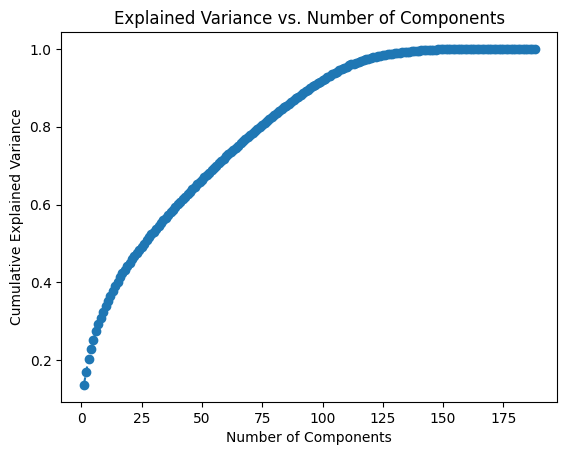

In [62]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [63]:
threshold = 0.98
num_components = np.argmax(cumulative_variance >= threshold) + 1
print(f'The number of components to explain at least {threshold * 100}% variance is: {num_components}')

The number of components to explain at least 98.0% variance is: 123


I will select the number of principal components that account for at least 98% of the total variance in the dataset. This approach ensures that most of the information is preserved while effectively reducing dimensionality. From my analysis, I noticed that the cumulative explained variance levels off after a certain number of components, indicating that additional components add minimal value to the overall variance.

In [64]:
def display_feature_significance(pca, features):
    pc1_weights = pca.components_[0]
    feature_weights = pd.DataFrame({'Feature': features, 'Weight': pc1_weights})
    feature_weights = feature_weights.reindex(feature_weights['Weight'].abs().sort_values(ascending=False).index)
    print(feature_weights)

# Call the function with your PCA object and original feature names
display_feature_significance(pca, data.columns)

      Feature    Weight
32   DR1TKCAL  0.193051
66   DR1TPHOS  0.187340
37   DR1TTFAT  0.184468
33   DR1TPROT  0.177981
84   DR1TS160  0.176372
..        ...       ...
176    BMILEG -0.000000
178   BMIARML -0.000000
180   BMIARMC -0.000000
182  BMIWAIST -0.000000
184    BMIHIP -0.000000

[188 rows x 2 columns]


Hence, the top 5 original features among these are:
1) DR1TKCAL
2) DR1TPHOS
3) DR1TTFAT
4) DR1TPROT
5) DR1TS160

With a combined weight of around 91.92%

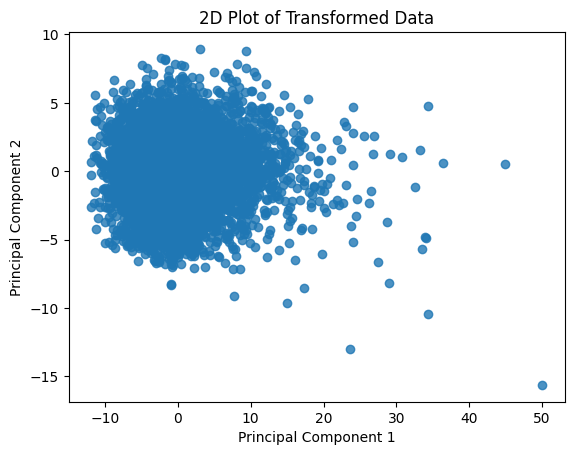

In [65]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Plot of Transformed Data')
plt.show()

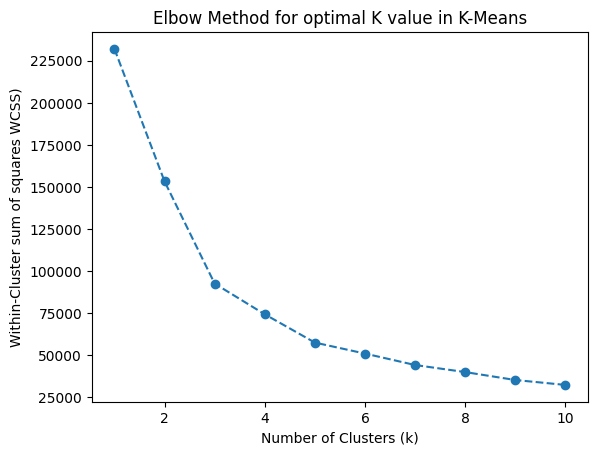

In [66]:
# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_pca[:, :2])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster sum of squares WCSS)')
plt.title('Elbow Method for optimal K value in K-Means')
plt.show()

Visually, the elbow in the plot suggests that k=3, is a reasonable choice for the optimal number of clusters. However, to confirm this more objectively, we can use the KneeLocator library, which detects the elbow point mathematically.

Optimal number of clusters (k) is: 3


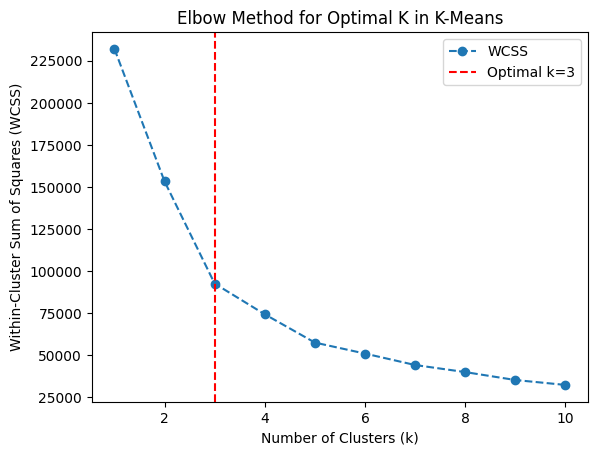

In [ ]:
from kneed import KneeLocator

# Compute WCSS for k values from 1 to 10
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca[:, :2])  # Use the first 2 PCA components
    wcss.append(kmeans.inertia_)

# Use KneeLocator to find the optimal k
knee_locator = KneeLocator(k_values, wcss, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee

print(f"Optimal number of clusters (k) is: {optimal_k}")

# Plot the Elbow Method with the optimal k
plt.plot(k_values, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_k, linestyle="--", color="red", label=f"Optimal k={optimal_k}")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K in K-Means")
plt.legend()
plt.show()


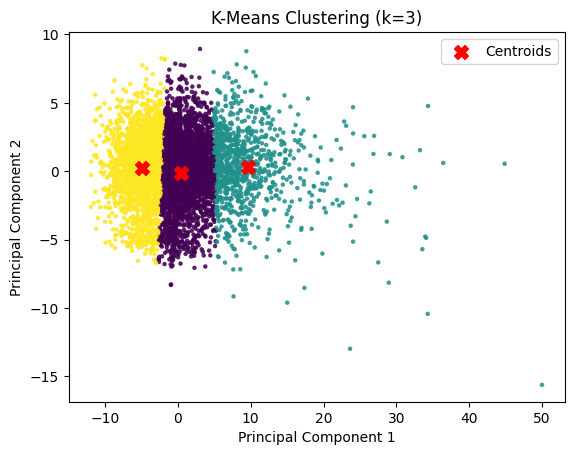

In [88]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_pca[:, :2])

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.8, s=5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.legend()
plt.show()

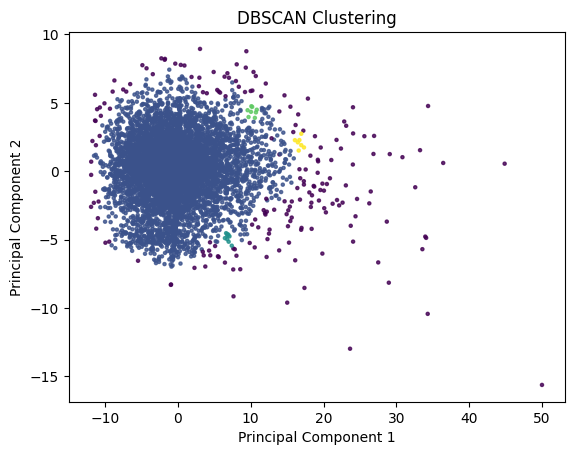

In [ ]:
dbscan = DBSCAN(eps=.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca[:, :2])
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.8, s=5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.show()

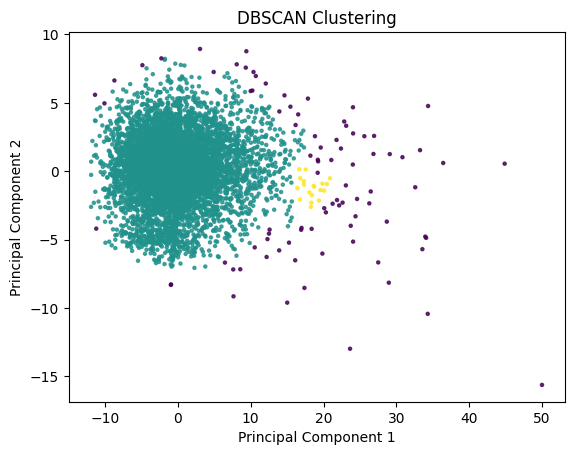

In [69]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca[:, :2])
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.8, s=5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.show()

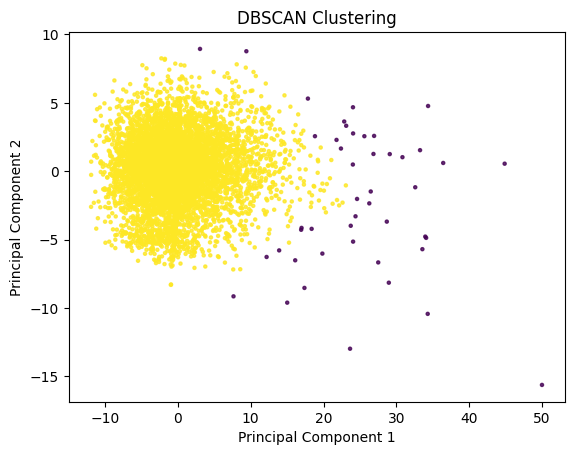

In [70]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca[:, :2])
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.8, s=5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.show()

Visually, the graph suggests the presence of two main clusters. However, K-Means identifies three clusters, and its formation does not align well with the data distribution. In contrast, DBSCAN produces a more reasonable clustering, effectively capturing the structure while also identifying necessary outliers.